In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

from utils.visualize import *
from utils.FIR_filter import *
from utils.signal_process import *
from utils.preprocess import *

import os

# ANC Action

In [2]:
# args
fs = 10
start_pt = 0
end_pt = -1
still_pt = 300
after_still_pt = 0
pool = 1.0
d = 0.05

dataset_folder = 'data/all'
window_size = 256
stride = 64
test_set=['m2', 'm5', 'm7', 'w1', 'w4']

best_score/total: 134/300


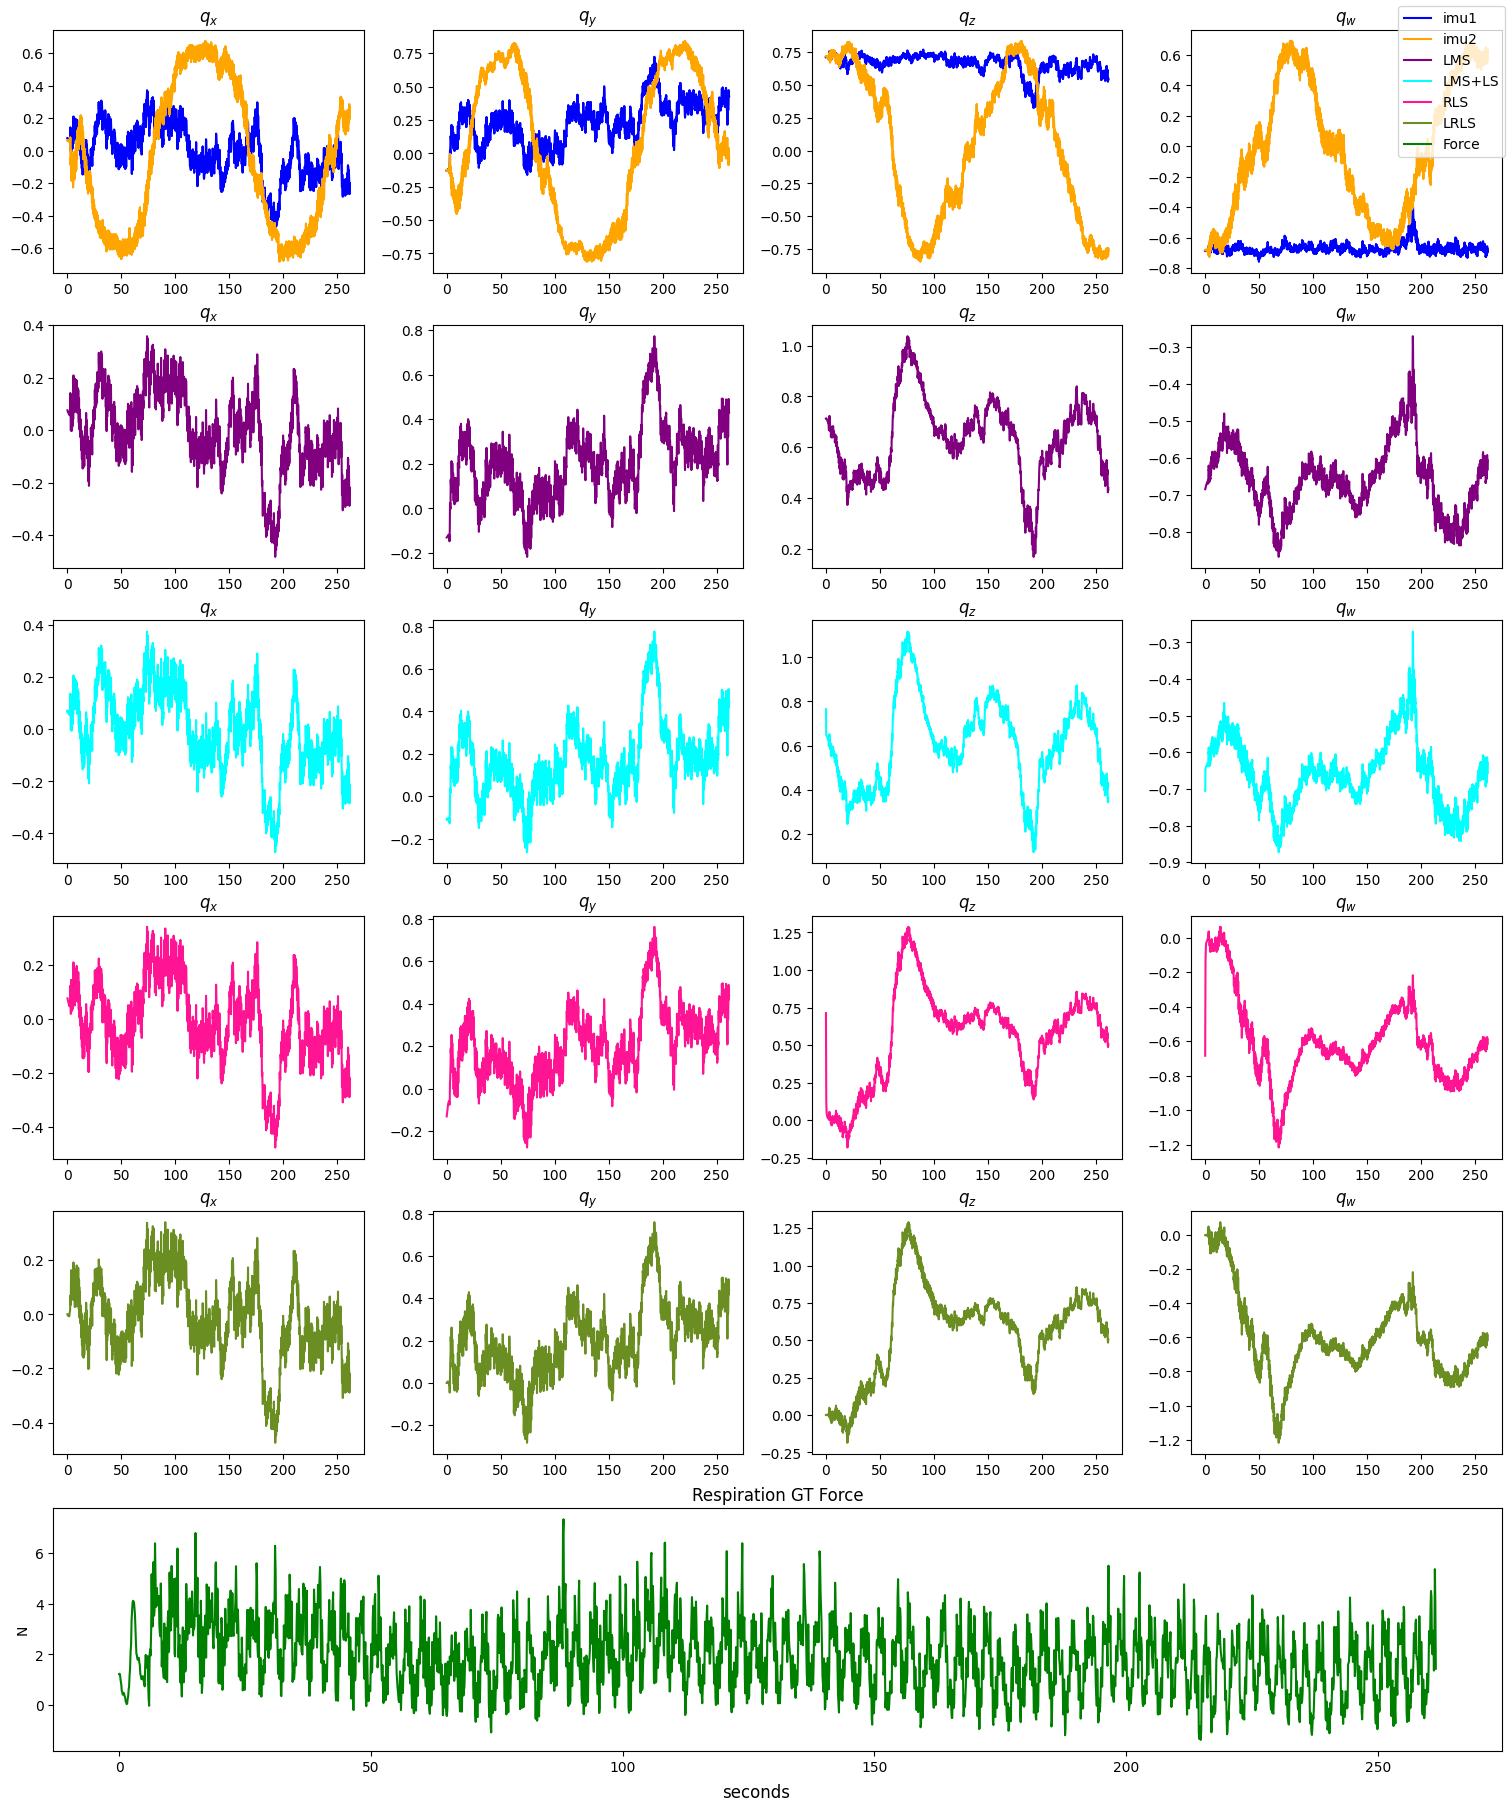

In [3]:
action_name = "run_stand_5"
person = 'hamham'
filename = f'./data/all/{person}/{action_name}.csv'

cols = ['q_x', 'q_y', 'q_z', 'q_w']
action_name = filename.split("_")[0]

# load data
data = pd.read_csv(filename)
data.columns = [
    "Timestamp",
    "imu1_q_x",
    "imu1_q_y",
    "imu1_q_z",
    "imu1_q_w",
    "imu2_q_x",
    "imu2_q_y",
    "imu2_q_z",
    "imu2_q_w",
    "Force",
    "RR",
]

data = data.iloc[start_pt:end_pt]

# align delay
data = sp.align_delay(data, delay=10)
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data = data.set_index("Timestamp")

# align IMU
q_corr = sp.Q_RANSAC(data[0:still_pt], pool=pool, d=d)
target, skew = 'imu1', 'imu2'
Q_skew = data[[skew + '_q_x', skew + '_q_y', skew + '_q_z', skew + '_q_w']].to_numpy()
Q_aligned = sp.align_quaternion(q_corr, Q_skew) # (sample num, 4)
data_aligned = data.copy()

for i, col in enumerate(cols):
    data_aligned[[skew + '_' + col]] = Q_aligned[:, i].reshape(-1, 1)

# specify data range
data_anc = data_aligned.copy() # data used in sml
data_anc = data_anc[still_pt+after_still_pt:]

outputs = sp.anc_process(data_anc, NTAPS=3, LEARNING_RATE=0.001, delta=1, lam_rls=0.9995, epsilon=1e-6, lam_lrls=0.9995)
draw_anc_curve_multi(data_anc, outputs=outputs, overlap=False, show_gt=True)


target_folder: data/all
data/all\m2\run_0520_0735.csv
best_score/total: 110/300
data/all\m2\sit_0520_0719.csv
best_score/total: 176/300
data/all\m2\stand_0520_0724.csv
best_score/total: 300/300
data/all\m2\walk_0520_0730.csv
best_score/total: 115/300
data/all\m5\run_0520_1036.csv
best_score/total: 79/300
data/all\m5\sit_0520_1022.csv
best_score/total: 300/300
data/all\m5\stand_0520_1027.csv
best_score/total: 300/300
data/all\m5\walk_0520_1031.csv
best_score/total: 118/300
data/all\m7\run_0621_0427.csv
best_score/total: 50/300
data/all\m7\sit_0621_0412.csv
best_score/total: 178/300
data/all\m7\stand_0621_0417.csv
best_score/total: 300/300
data/all\m7\walk_0621_0422.csv
best_score/total: 278/300
data/all\w1\run_0604_0714.csv
best_score/total: 80/300
data/all\w1\run_0604_0733.csv
best_score/total: 220/300
data/all\w1\sit_0604_0658.csv
best_score/total: 237/300
data/all\w1\stand_0604_0703.csv
best_score/total: 288/300
data/all\w1\walk_0604_0710.csv
best_score/total: 231/300
data/all\w4\run

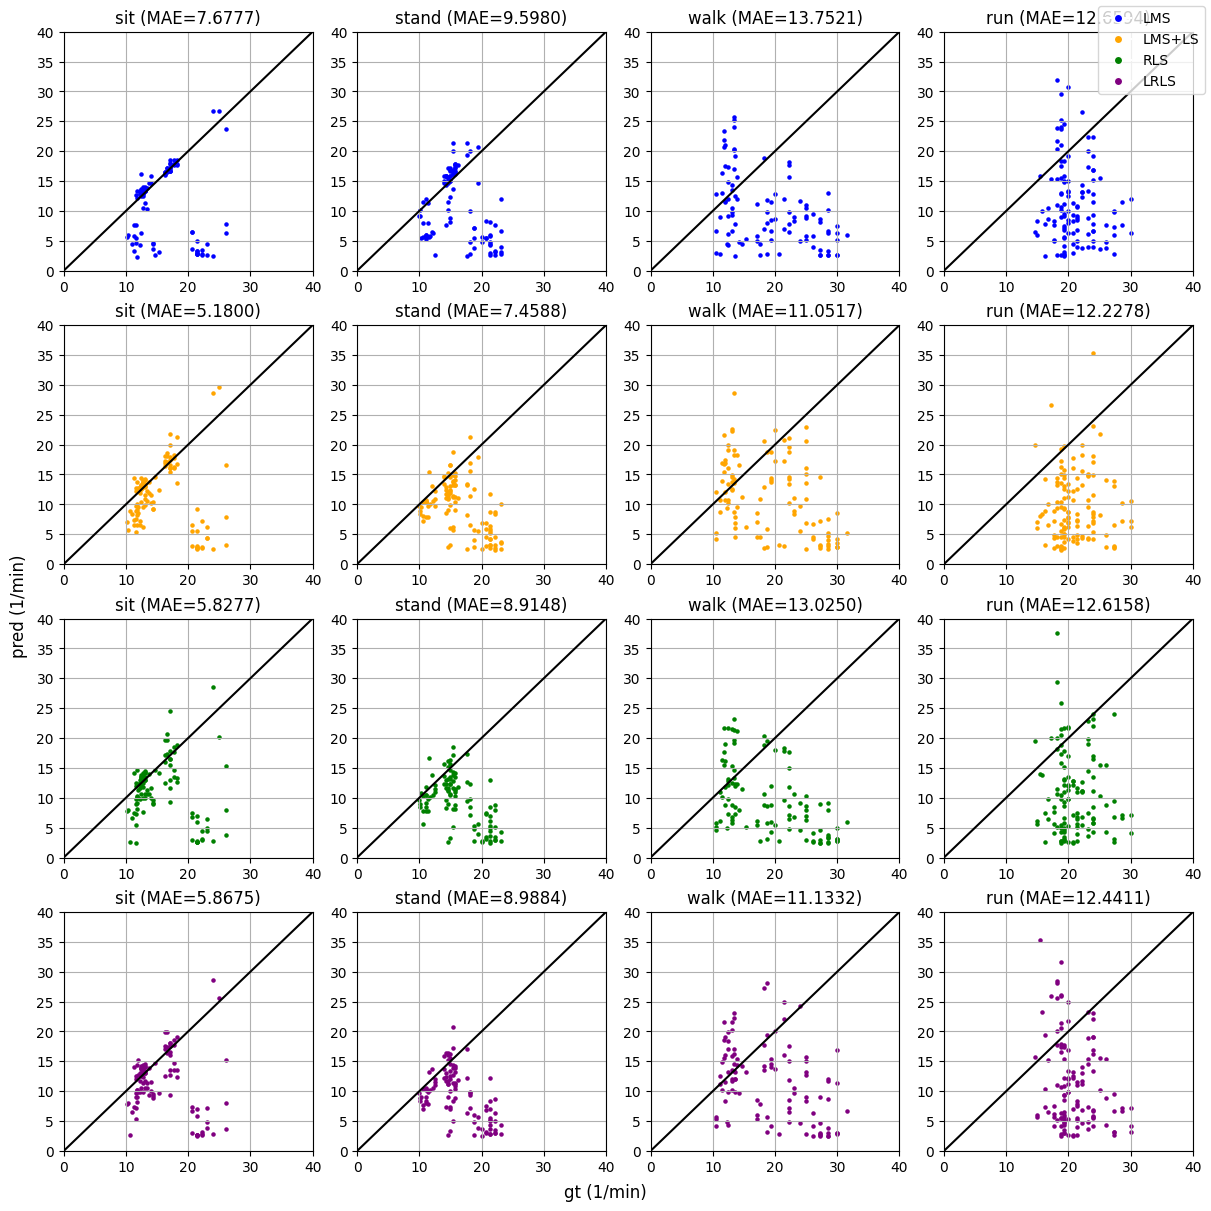

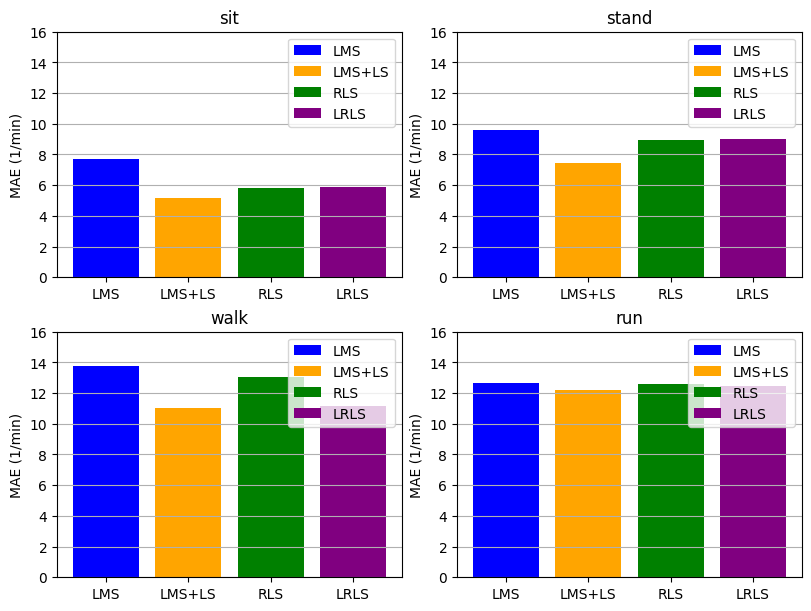

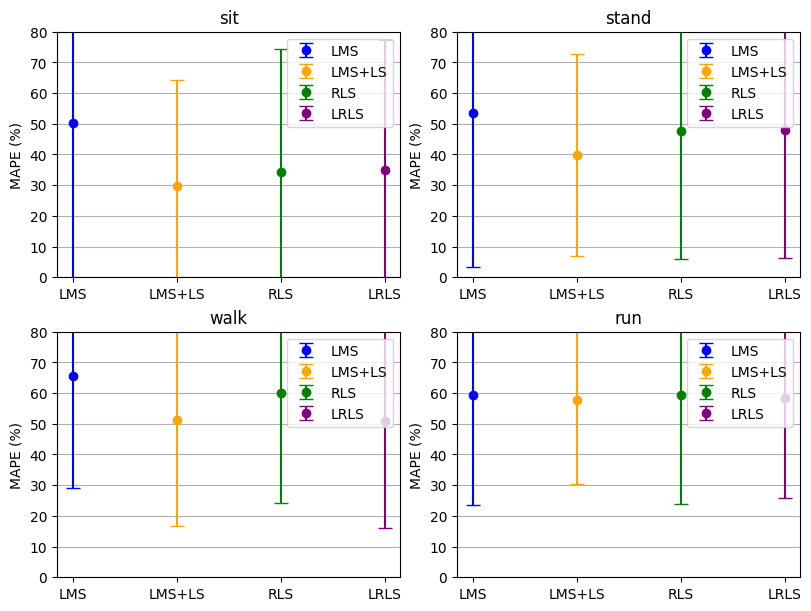

In [4]:
target_folder = dataset_folder
print(f"target_folder: {target_folder}")

prepare_data_anc(target_folder,
                fs=fs,
                start_pt=start_pt,
                end_pt=end_pt,
                still_pt=still_pt,
                after_still_pt=after_still_pt,
                pool=pool,
                d=d,
                window_size=window_size,
                stride=stride,)